In [1]:
import cv2
import numpy as np
import napari

# ---- STEP 1: Load image and mask ----
image = cv2.imread("images/00067.png", cv2.IMREAD_GRAYSCALE)
mask = cv2.imread("labels/00067.png", cv2.IMREAD_GRAYSCALE)

# ---- STEP 2: Resize image to match mask (512, 512) ----
image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
assert mask.shape == (512, 512), "Mask must already be 512x512"

# ---- STEP 3: Convert grayscale mask to class IDs (0,85,170,255 → 0,1,2,3) ----
grayscale_values = [0, 85, 170, 255]
grayscale_to_class = {v: i for i, v in enumerate(grayscale_values)}
class_mask = np.vectorize(lambda x: grayscale_to_class.get(x, 0))(mask)

# ---- STEP 4: Launch napari to overlay image and editable label ----
viewer = napari.Viewer()
viewer.add_image(image_resized, name="Resized Image", colormap="gray")
label_layer = viewer.add_labels(class_mask, name="Editable Mask")
napari.run()

# ---- STEP 5: After editing, convert class IDs back to grayscale and save ----
edited_class_mask = label_layer.data
class_to_grayscale = {i: v for i, v in enumerate(grayscale_values)}
final_mask = np.vectorize(lambda x: class_to_grayscale.get(x, 0))(edited_class_mask)

cv2.imwrite("updated_mask.png", final_mask.astype(np.uint8))


True

Image shape: (512, 512)
Image dtype: int32


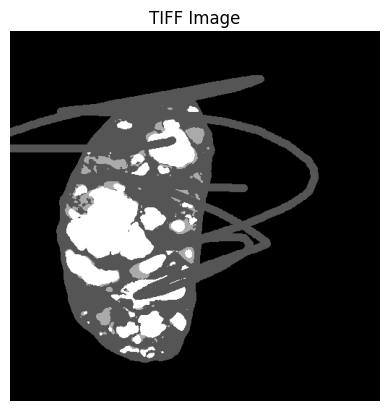

In [18]:
import matplotlib.pyplot as plt
from tifffile import imread

# Load the TIFF file
tiff_path = 'Edit Mask.tif'
image = imread(tiff_path)

print("Image shape:", image.shape)
print("Image dtype:", image.dtype)

# Visualize
if image.ndim == 2:
    # Single grayscale image
    plt.imshow(image, cmap='gray')
elif image.ndim == 3:
    # Multichannel or multi-slice — visualize the first slice/channel
    plt.imshow(image[0], cmap='gray')
else:
    raise ValueError("Unsupported TIFF shape")

plt.title("TIFF Image")
plt.axis('off')
plt.show()